# OrthoSAM examples - using the Ravi2 Orthomosaic


In [1]:
import json
import os
import sys
from utility import load_config,create_dir_ifnotexist, prompt_fid,load_image, plot_tiling_with_overlap

**This example creates a crop of the file `Ravi2_orthomosaic_02mm.png` that can be downloaded from: https://doi.org/10.5281/zenodo.16567549**

We are using [ImageMagick](https://imagemagick.org/) to create the crop (but any other software will work as well). We are cropping out an area of 8192x8192 pixels:
```bash
magick Ravi2_orthomosaic_02mm.png -crop 8192x8192+6000+8000 Ravi2_orthomosaic_02mm_crop.png
```

and place them into `data/Ravi`.

In the first step, we set parameters and create the list of files. If you set `id=None`, all files in the directory listed in 'DatasetName' will be processed. *We are processing the images one by one and will start with id=1 (because Ravi2_orthomosaic_02mm.png is id=0).*

In [43]:
id=1 # Filename or the index after sorting by file name. If not known input None and all files will be listed with the index.
# For this example, we only work with the first image (id=0).

#main_para defines the parameters for the first layer
#it also serves as a template for the later layers.
main_para={'OutDIR': f'Ravi/Ravi_{id}_up5_org',# where output will be stored relative to the MainOutDIR stored in config.json
    'DatasetName': 'Ravi/',#where image is stored
    'fid': id, #Filename or the index after sorting by file name. If index is not known use None and all files will be listed with the index.
    'resolution(mm)': 0.2, #image resolution in mm/pixel
    'tile_size': 1024,
    'tile_overlap':200,
    'resample_factor': 1/3, #'Auto': auto select resample rate.
    'input_point_per_axis': 30,
    'dilation_size':5,
    'stability_t':0.85,
    'expected_min_size(sqmm)': 50,
    'min_radius': 0,
    'Calculate_stats': True, # True: calculate statistics. 
    'Discord_notification': False,# True: send discord when finished. If you wish to use this feature, please create a file name DWH.txt in the code directory and set the webhook.
    'Plotting': True# True: plot the results
    }

#para_list defines the parameters for the later layers
#each dictionary corresponds to one layer.
# The first layer is defined in main_para.
#the second layer is defined in para_list[0] and so on.
#main_para serves as a template for the later layers.
#and in para_list specify the parameters for each layer that need to be updated.
# para_list = []
para_list=[
    {'resample_factor':1/5, #Because of the high resolution of the image, we are upsampling with factor 1/5
    }
    ]

#parameters for preprocessing. Only create this list if you want to use preprocessing.
#preprocessing is optional.
pre_para_list=[{#'Gaussian': {'kernel size':3},
                #'CLAHE':{'clip limit':2},
                #'Resample': {'fxy':4},
                #'Buffering': {'crop size': crop_size}
            },{},{}]

You can verify the parameters by looking at the dictonaries

In [42]:
main_para

{'OutDIR': 'Ravi/Ravi_1_up3_org',
 'DatasetName': 'Ravi/',
 'fid': 1,
 'resolution(mm)': 0.2,
 'tile_size': 1024,
 'tile_overlap': 200,
 'resample_factor': 0.3333333333333333,
 'input_point_per_axis': 30,
 'dilation_size': 5,
 'stability_t': 0.85,
 'expected_min_size(sqmm)': 50,
 'min_radius': 0,
 'Calculate_stats': True,
 'Discord_notification': False,
 'Plotting': True}

In [20]:
main_para['1st_resample_factor'] = main_para['resample_factor']
config = load_config()
main_para={**config,**main_para}
main_para['OutDIR'] = os.path.join(main_para.get('MainOutDIR'), main_para.get('OutDIR'))
if not os.path.exists(os.path.join(main_para.get('DataDIR'), main_para.get('DatasetName'))):
    print('Input directory does not exist. Exiting script.')
    sys.exit()

OutDIR=main_para.get('OutDIR')
create_dir_ifnotexist(OutDIR)
# if main_para.get('fid')==None:
#     main_para=prompt_fid(main_para)

/home/bodo/OrthoSAM/data/Ravi/Ravi2_orthomosaic_02mm_crop.png imported


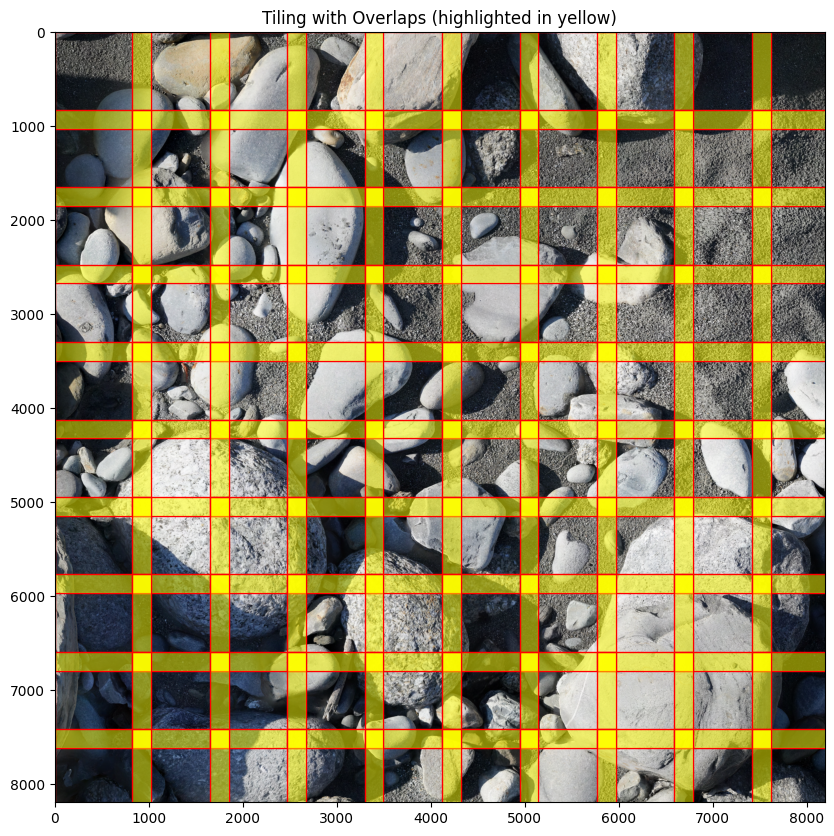

In [21]:
import matplotlib.pyplot as plt
DataDIR = main_para.get('DataDIR')
DSname = main_para.get('DatasetName')
fid = main_para.get('fid')
crop_size = main_para.get('tile_size')
overlap = main_para.get('tile_overlap')
image=load_image(DataDIR,DSname,fid)

plt.figure(figsize=(15,10))
plot_tiling_with_overlap(image, (crop_size,crop_size), overlap)

In [22]:
# Save init_para to a JSON file
para_list.insert(0, {})
pass_para_list = [dict(main_para, **para) for para in para_list]
with open(OutDIR+f'init_para.json', 'w') as json_file:
    json.dump(pass_para_list, json_file, indent=4)
with open(OutDIR+f'pre_para.json', 'w') as json_file:
    json.dump(pre_para_list, json_file, indent=4)

2025-08-20 09:37:35,532 - INFO - ---------------
2025-08-20 09:37:35,533 - INFO - Layer 0
2025-08-20 09:37:35,533 - INFO - 	Segment tiles
2025-08-20 09:37:35,534 - INFO - 	Loaded parameters from json
2025-08-20 09:37:35,534 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org', 'DatasetName': 'Ravi/', 'fid': 1, 'resolution(mm)': 0.2, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 0.3333333333333333, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 50, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 0.3333333333333333}
2025-08-20 09:37:35,535 - INFO - 	Minimum expected size: 416.6666666666666 pixel
2025-08-20 09:37:35,535 - INFO - 	No pre_para found. Only applying 

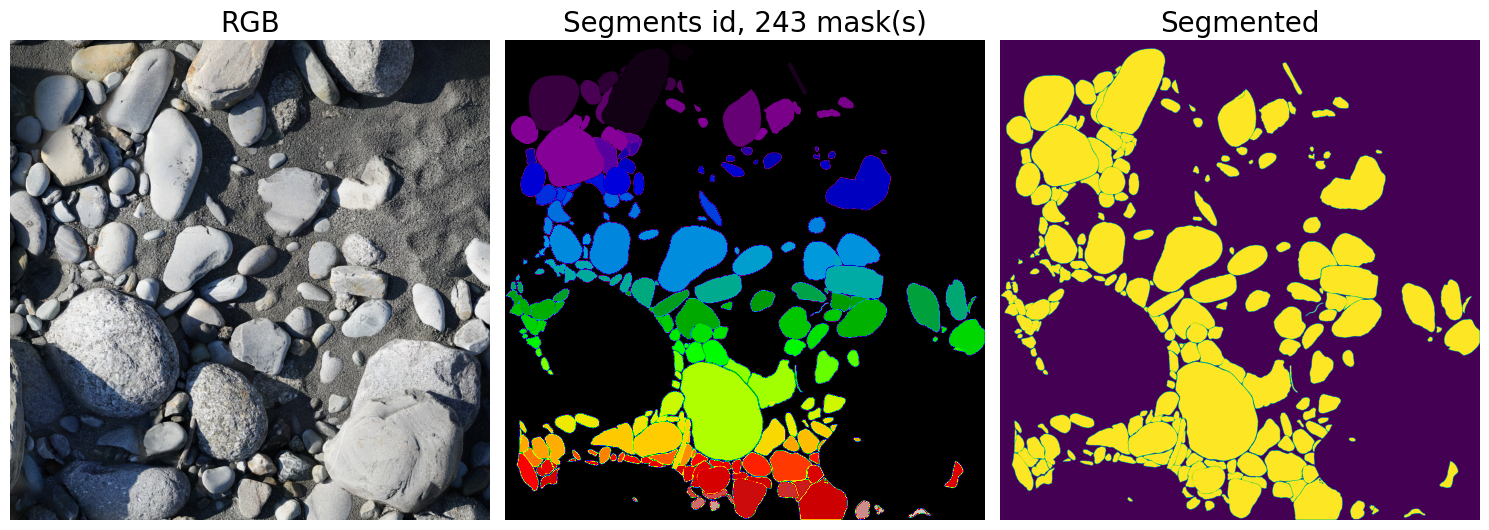

2025-08-20 09:45:30,060 - INFO - 	script took: 6.54 seconds
2025-08-20 09:45:30,061 - INFO - 	Merging completed.
2025-08-20 09:45:30,061 - INFO - ---------------
2025-08-20 09:45:30,062 - INFO - ---------------
2025-08-20 09:45:30,062 - INFO - Layer 1
2025-08-20 09:45:30,063 - INFO - 	Loaded parameters from /home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org
2025-08-20 09:45:30,063 - INFO - {'MODEL_TYPE': 'vit_h', 'CheckpointDIR': '/home/bodo/OrthoSAM/MetaSAM', 'DataDIR': '/home/bodo/OrthoSAM/data', 'BaseDIR': '/home/bodo/OrthoSAM', 'MainOutDIR': '/home/bodo/OrthoSAM/output', 'OutDIR': '/home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org', 'DatasetName': 'Ravi/', 'fid': 1, 'resolution(mm)': 0.2, 'tile_size': 1024, 'tile_overlap': 200, 'resample_factor': 0.2, 'input_point_per_axis': 30, 'dilation_size': 5, 'stability_t': 0.85, 'expected_min_size(sqmm)': 50, 'min_radius': 0, 'Calculate_stats': True, 'Discord_notification': False, 'Plotting': True, '1st_resample_factor': 0.3333333333333333}
2025-08

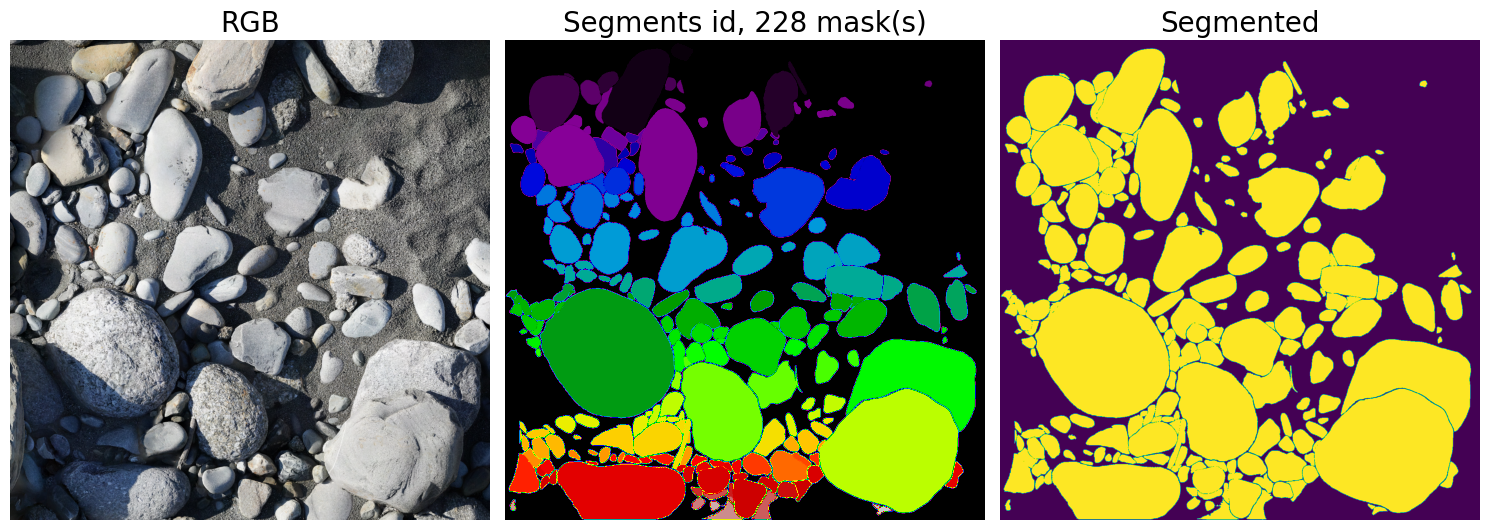

2025-08-20 09:47:16,028 - INFO - 	script took: 3.86 seconds
2025-08-20 09:47:16,029 - INFO - 	Merging completed.
2025-08-20 09:47:16,030 - INFO - ---------------
2025-08-20 09:47:16,135 - INFO - 
2025-08-20 09:47:16,136 - INFO -   0%|          | 0/229 [00:00<?, ?id/s]
2025-08-20 09:47:16,137 - INFO - 
2025-08-20 09:47:16,137 - INFO - 100%|##########| 229/229 [00:00<00:00, 499477.70id/s]
2025-08-20 09:47:16,166 - INFO - 	Layer 001 discovered 38 new mask(s)
2025-08-20 09:47:16,442 - INFO - 
2025-08-20 09:47:16,443 - INFO -   0%|          | 0/278 [00:00<?, ?it/s]
2025-08-20 09:47:16,546 - INFO - 
2025-08-20 09:47:16,546 - INFO -  10%|#         | 28/278 [00:00<00:00, 275.34it/s]
2025-08-20 09:47:16,648 - INFO - 
2025-08-20 09:47:16,648 - INFO -  20%|##        | 56/278 [00:00<00:00, 274.86it/s]
2025-08-20 09:47:16,751 - INFO - 
2025-08-20 09:47:16,752 - INFO -  30%|###       | 84/278 [00:00<00:00, 273.14it/s]
2025-08-20 09:47:16,852 - INFO - 
2025-08-20 09:47:16,853 - INFO -  40%|####      

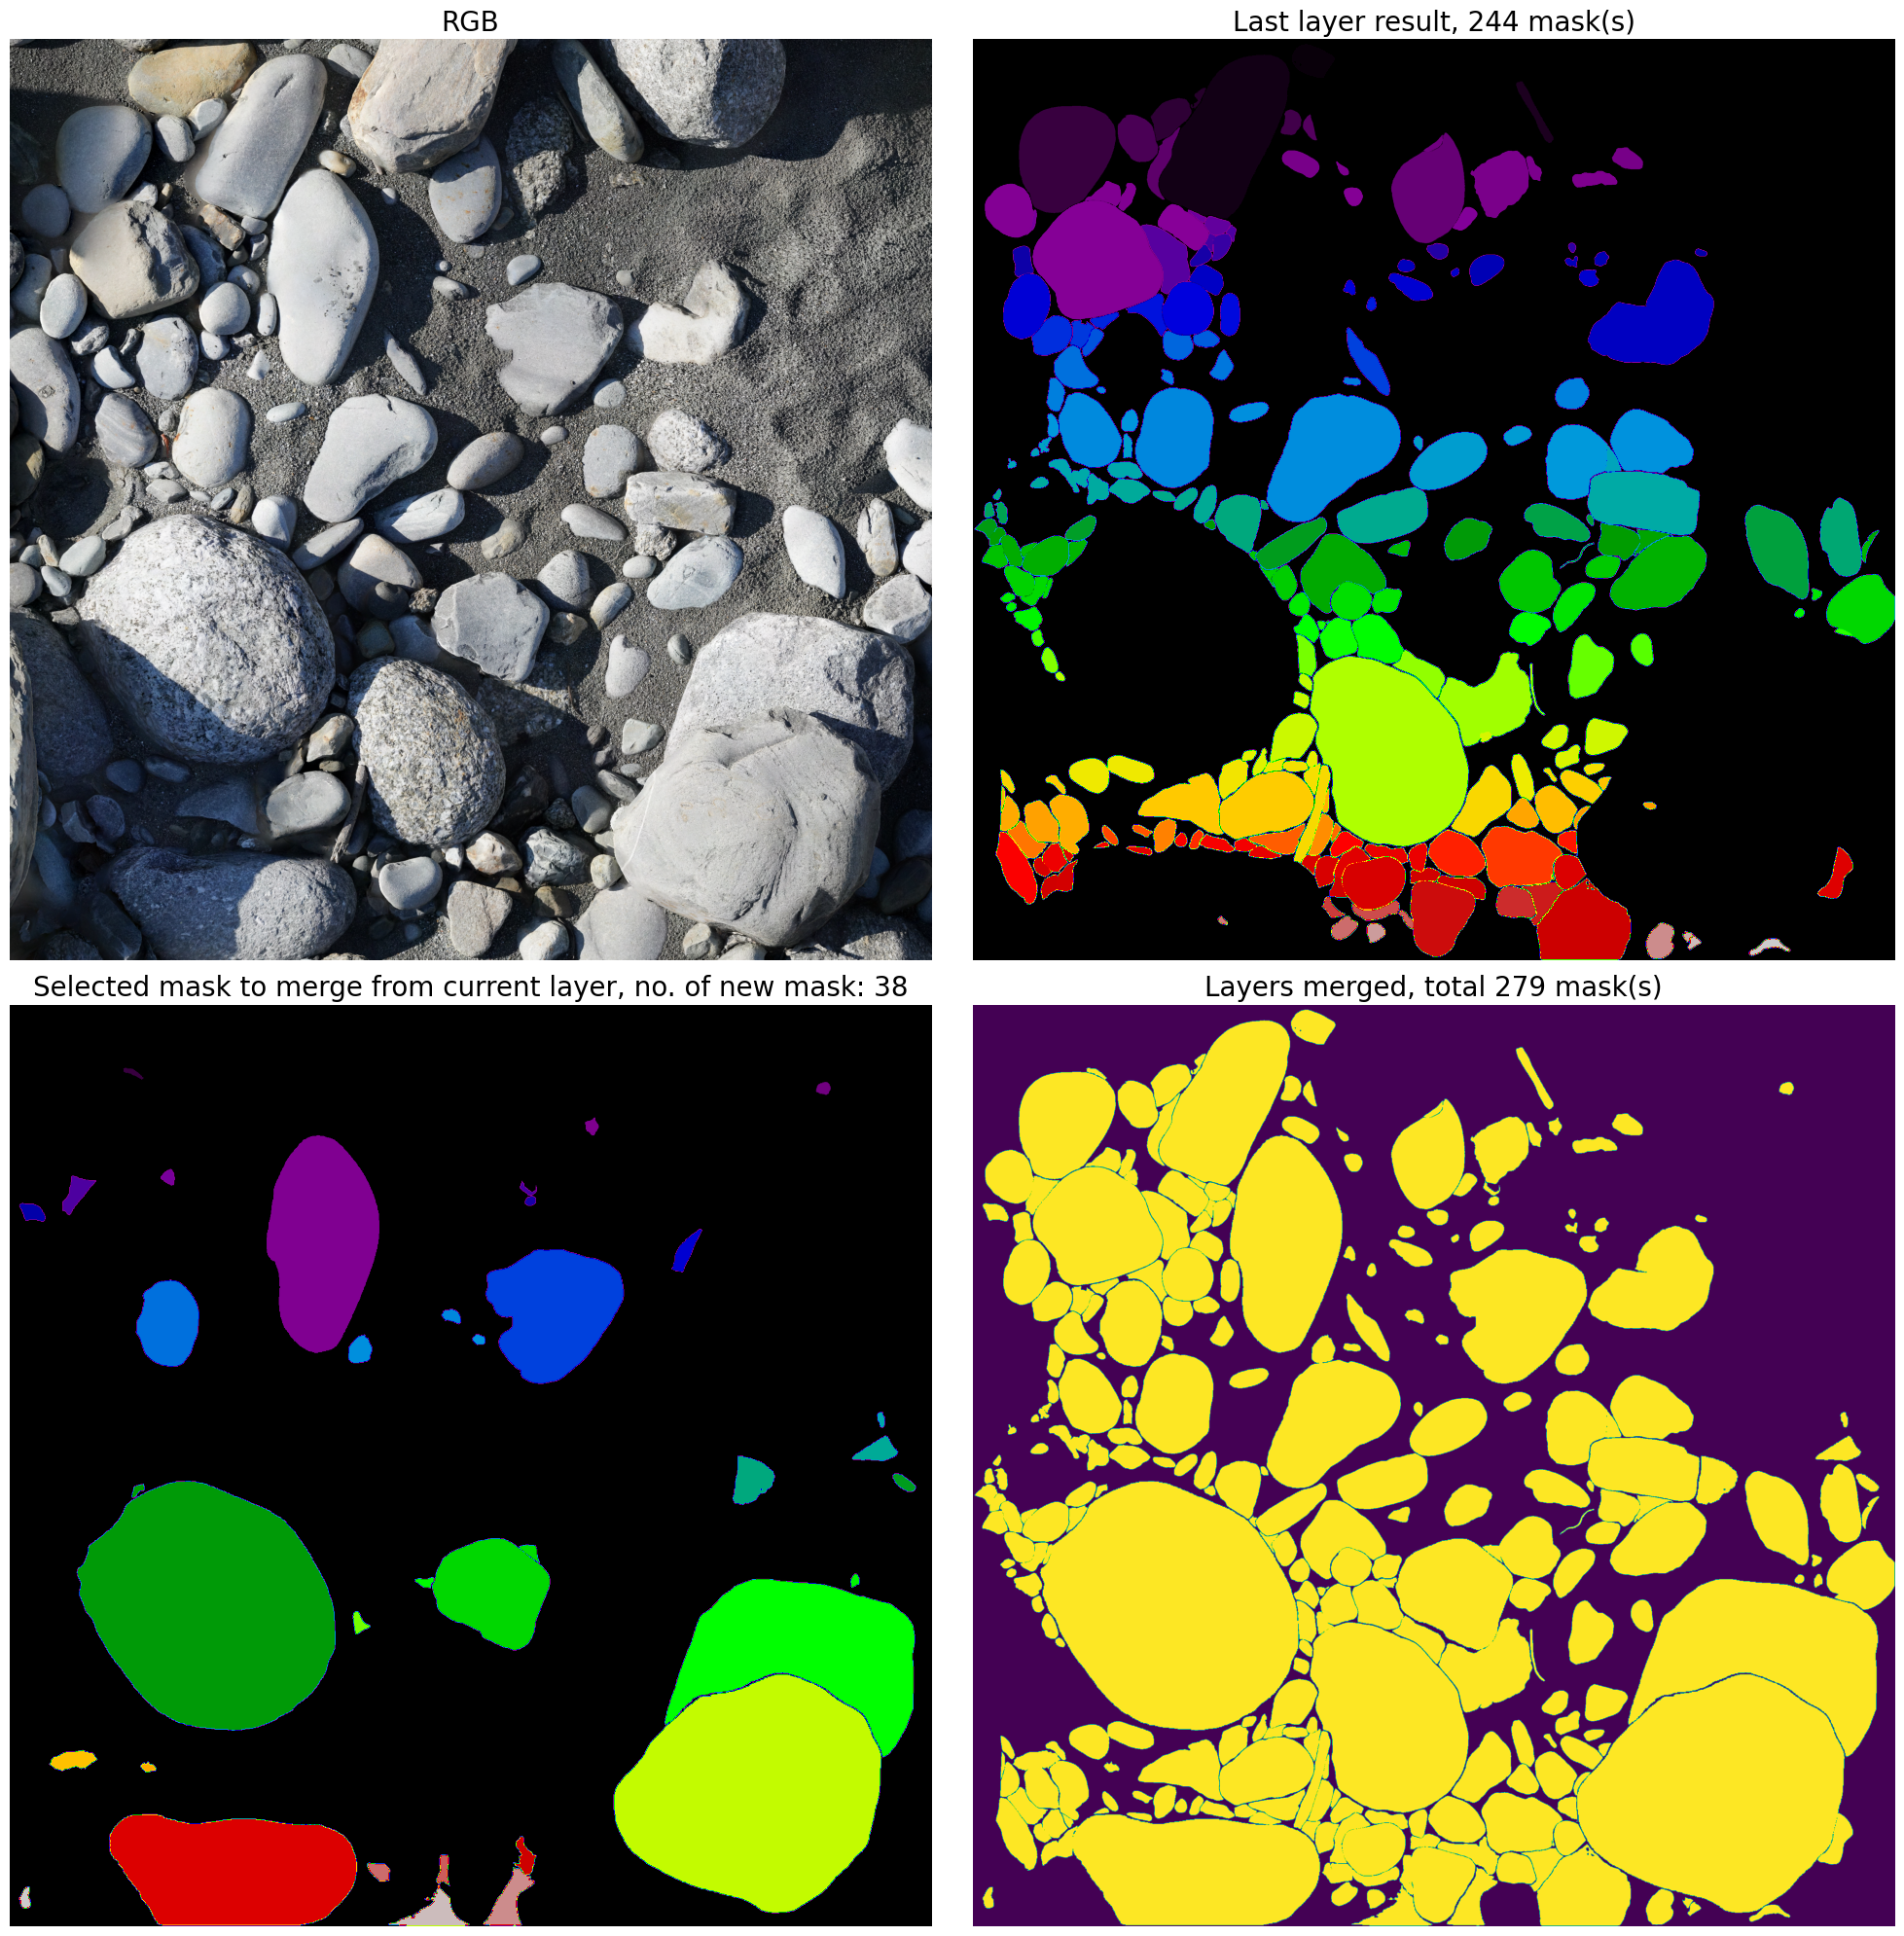

2025-08-20 09:47:21,481 - INFO - 	Saving id mask to /home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org/Merged/Merged_Layers_001.npy...
2025-08-20 09:47:21,520 - INFO - 	Saved
2025-08-20 09:47:21,521 - INFO - 	script took: 111.46 seconds
2025-08-20 09:47:21,522 - INFO - 	Output saved to /home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org
2025-08-20 09:47:21,524 - INFO - ---------------
2025-08-20 09:47:21,524 - INFO - Run took: 9.77 minutes
2025-08-20 09:47:21,525 - INFO - Calculating statistics...
2025-08-20 09:47:23,589 - INFO - /home/bodo/OrthoSAM/data/Ravi/Ravi2_orthomosaic_02mm_crop.png imported
2025-08-20 09:47:23,606 - INFO - /home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org/Merged/Merged_Layers_001.npy imported
2025-08-20 09:47:27,639 - INFO - Statistics saved to props.csv


In [23]:
from OrthoSAM import orthosam
orthosam(pass_para_list)

# Verify results and plot

Here we do some first-oder analysis of the output statistic data.

In [24]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

merged_results = pd.read_csv('/home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org/props.csv')

In [25]:
merged_results.head()

label  centroid-0   centroid-1  axis_major_length  axis_minor_length  \
0      1   66.849963  1004.647434          77.546334          56.515366   
1      2  291.849437   752.653438         333.763813         161.780699   
2      3  218.460540  1662.372141         141.841494          16.854541   
3      4  175.674812   667.923872          45.096903          13.884198   
4      5  234.299856   583.871417          85.176644          53.617235   

       area   perimeter        IR         h       IRt       IRn      mean_R  \
0   3387.96  245.667446  0.705428  0.024610  0.963480  0.732167  147.149600   
1  41565.60  866.265497  0.696052  0.120450  0.828503  0.840132  161.242287   
2   1747.08  281.305627  0.277438  0.620293  0.281047  0.987159   21.851157   
3    383.04  125.361645  0.306284  0.280051  0.627265  0.488285  109.507101   
4   3491.28  240.370389  0.759334  0.051703  0.924172  0.821637  145.674561   

       mean_G      mean_B  median_R  median_G  median_B  
0  148.391303  146.710764     166.0     167.0     165.0  
1  163.941788  166.952569     160.0     164.0     169.0  
2   24.636422   28.053896      19.0      21.0      25.0  
3  106.571846  101.653613     106.0     103.0      97.0  
4  149.205632  149.405399     169.0     174.0     174.0

In [26]:
len(merged_results)

277

In [12]:
merged_results.describe()

/home/bodo/miniconda3/envs/OrthoSAM/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/bodo/miniconda3/envs/OrthoSAM/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


label   centroid-0   centroid-1  axis_major_length  \
count  262.000000   262.000000   262.000000         262.000000   
mean   131.500000  1203.590366   761.142538          82.615966   
std     75.777085   547.121860   488.414412          72.941630   
min      1.000000    50.146360    34.035606           0.000000   
25%     66.250000   736.873322   337.978531          40.574760   
50%    131.500000  1198.576448   744.786236          57.696859   
75%    196.750000  1726.913202  1138.332169          97.620979   
max    262.000000  2031.544271  1985.217526         475.953573   

       axis_minor_length           area    perimeter          IR           h  \
count         262.000000     262.000000   262.000000  262.000000  261.000000   
mean           48.185684    5572.550840   235.443587         inf    0.111824   
std            51.257470   15617.212055   238.134242         NaN    0.125055   
min             0.000000       0.640000     0.000000    0.131432    0.000220   
25%            20.069012     585.120000   107.400418    0.589384    0.030104   
50%            31.561028    1316.480000   161.913117    0.719029    0.069973   
75%            53.912303    3586.400000   262.972619    0.804278    0.152507   
max           398.079518  148511.360000  1841.259855         inf    1.000000   

              IRt         IRn      mean_R      mean_G      mean_B    median_R  \
count  261.000000  261.000000  262.000000  262.000000  262.000000  262.000000   
mean     0.848634         inf   81.942994   85.547660   89.720025   84.118321   
std      0.150453         NaN   61.029541   59.451950   56.667724   69.837162   
min      0.000000    0.324469    1.827812    2.832450    3.861160    0.000000   
25%      0.785813    0.735164   25.302206   30.799457   38.365026   21.250000   
50%      0.898186    0.830619   66.154181   67.427546   75.139879   50.500000   
75%      0.955433    0.873838  140.036087  141.713599  141.549551  156.750000   
max      0.999670         inf  220.700000  221.013889  217.290712  229.000000   

         median_G    median_B  
count  262.000000  262.000000  
mean    87.664122   91.574427  
std     67.701535   63.902488  
min      1.000000    2.000000  
25%     28.000000   35.000000  
50%     54.500000   68.500000  
75%    157.000000  153.750000  
max    230.000000  226.000000

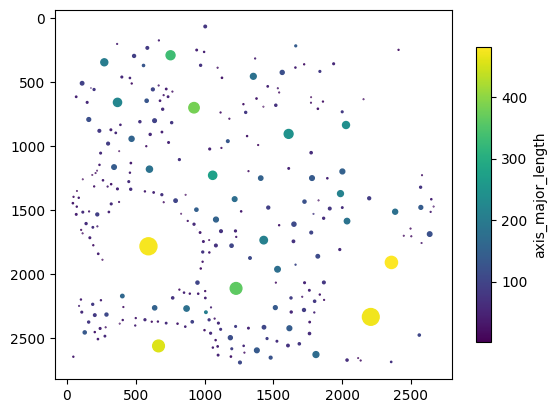

In [39]:
plt.scatter(merged_results['centroid-1'], 
            merged_results['centroid-0'], 
            c=merged_results['axis_major_length'], 
            s=merged_results['area']/1000, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')
plt.gca().invert_yaxis()

/home/bodo/OrthoSAM/data/Ravi/Ravi2_orthomosaic_02mm_crop.png imported


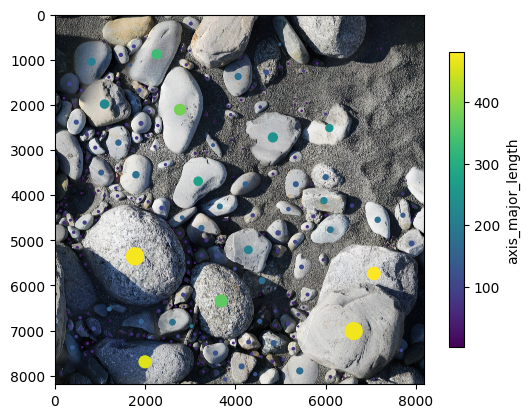

In [28]:
image = load_image(DataDIR,DSname,fid)
plt.imshow(image)

plt.scatter(merged_results['centroid-1']*3, merged_results['centroid-0']*3, c=merged_results['axis_major_length'], s=merged_results['area']/1000, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')

## Loading labeled images

In [29]:
merged_img = np.load('/home/bodo/OrthoSAM/output/Ravi/Ravi_1_up5_org/Merged/Merged_Layers_001.npy')

In [30]:
merged_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2731, 2731))

In [31]:
#convert to float and then set background to nan
merged_img = merged_img.astype(np.float32)

In [32]:
merged_img[merged_img == 0.0] = np.nan

In [33]:
len(np.unique(merged_img[~np.isnan(merged_img)]))

278

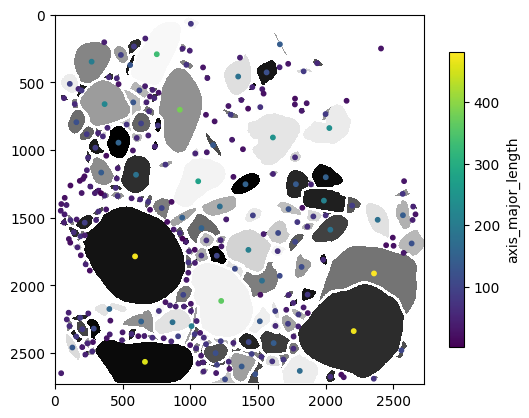

In [34]:
vals = np.linspace(0,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.gray(vals))
plt.imshow(merged_img, cmap=cmap)

plt.scatter(merged_results['centroid-1'], merged_results['centroid-0'], c=merged_results['axis_major_length'], s=10, cmap='viridis')
h = plt.colorbar(shrink=0.8)
h.set_label('axis_major_length')

## Filter out pebbles with a roundness metric (isoperimetric ratio)

There are different ways to remove objects from the database that are no pebbles. You can do this manually by looking at the labelled images (see next point) - but this will be tidious when there are many pebbles. In this example, we rely on a roundness factor (see relevant publications cited in the main manuscript, including Cox, 1927; Pokhrel et al., 2024; Roussillon et al., 2009. The isoperimetric ratio is defined as the ratio of the area in 2D to its perimeter. This metric is dependent on the shape of the pebble, and hence a normalized isoperimetric ratio (IRn) has been developed that removes (partly) a shape dependence. The IRn is the isoperimetric ratio divided by a maximum theoretical isoperimetric ratio (IRt). 

In our output database, we provide all variants of the  isoperimetric ratio. For example, we can color each centroid by its IRn:

/home/bodo/OrthoSAM/data/Ravi/Ravi2_orthomosaic_02mm_crop.png imported


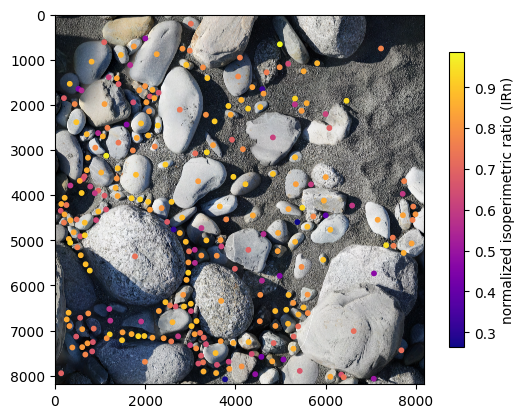

In [40]:
image = load_image(DataDIR,DSname,fid)
plt.imshow(image)

plt.scatter(merged_results['centroid-1']*3, merged_results['centroid-0']*3, c=merged_results['IRn'], s=10, cmap='plasma')
h = plt.colorbar(shrink=0.8)
h.set_label('normalized isoperimetric ratio (IRn)')

In [36]:
merged_results[merged_results['IRn'] < 0.6]

label   centroid-0   centroid-1  axis_major_length  axis_minor_length  \
3        4   175.674812   667.923872          45.096903          13.884198   
11      12   371.758824   556.265812         129.393361          31.908306   
30      31   547.945813   174.014778          51.164899           5.082627   
31      32   559.627921   196.889019          78.510480          34.972511   
33      34   549.903181  1532.183956          36.839958          16.167360   
48      49   662.833787  1773.174387          24.201344          17.184395   
61      62   811.418716   529.813478          73.657494          54.710307   
66      67   874.607210   319.020027          50.902122          37.037108   
98      99  1261.833680   114.754678          16.415156          15.774784   
102    103  1323.614464  2569.894107          75.868647          37.775114   
104    105  1318.320539   295.239627          40.216870          12.860974   
113    114  1409.986136  2196.187531          86.488622          68.705171   
133    134  1482.821958  2000.706231          63.918017          34.968427   
135    136  1576.346566  1082.844789         153.153805         118.983548   
143    144  1532.085409  1791.368327          79.908085          11.648199   
149    150  1587.084507   877.486385          34.739613          25.804461   
155    156  1620.733290  1541.836173          39.766629          20.374714   
169    170  1911.631436  2357.785882         482.220323         254.109649   
173    174  1736.806394  1033.371226          19.635937          15.884581   
179    180  1833.664638  1034.510791          40.402748          24.574407   
182    183  1965.008547  1530.126529         175.434599         130.736354   
184    185  1929.224644  1661.059514         109.709853          12.223728   
198    199  2174.301141   402.336078         162.579110          57.407595   
210    211  2266.671592   637.265429         149.956053          92.627920   
218    219  2260.292463   409.780652          27.110279          15.799515   
227    228  2375.962815   910.364751          95.594665          45.383500   
255    256  2527.639650  1525.741512          67.417547          29.472646   
261    262  2547.862982  1688.463039          77.545784          53.681292   
267    268  2656.036145  1480.139759         124.736458          50.490629   
270    271  2693.864579  1257.137118         109.763735          63.894142   
276    277  2689.399429  2356.079967          73.550017          24.903466   

         area    perimeter        IR         h       IRt       IRn  \
3      383.04   125.361645  0.306284  0.280051  0.627265  0.488285   
11    2498.76   326.099740  0.295280  0.365257  0.530718  0.556378   
30      73.08    92.943355  0.106309  0.671214  0.237540  0.447543   
31    1848.96   229.757987  0.440145  0.147189  0.792813  0.555169   
33     260.28   113.016861  0.256073  0.152096  0.786352  0.325647   
48     264.24    77.638182  0.550881  0.028747  0.957417  0.575383   
61    2254.32   249.267446  0.455926  0.021786  0.967630  0.471178   
66    1348.20   177.998398  0.534727  0.024859  0.963115  0.555206   
98     173.16    61.104372  0.582791  0.000396  0.999406  0.583137   
102   2016.00   225.494026  0.498231  0.112360  0.839466  0.593509   
104    347.04   106.754329  0.382665  0.265629  0.644325  0.593900   
113   4336.56   307.179307  0.577526  0.013131  0.980417  0.589061   
133   1213.20   212.198398  0.338577  0.085706  0.876137  0.386444   
135  11852.28   509.821601  0.573027  0.015766  0.976513  0.586809   
143    202.32   168.835151  0.089191  0.555846  0.338984  0.263114   
149    383.40   126.621948  0.300500  0.021780  0.967639  0.310549   
155    549.36   120.341125  0.476693  0.103967  0.850921  0.560208   
169  76691.52  1545.922943  0.403257  0.095972  0.861911  0.467863   
173    202.68    67.995541  0.550884  0.011154  0.983351  0.560211   
179    650.52   127.044069  0.506479  0.059340  0.913259  0.554585   
182  15836.40   607.603939  0.539045  

In [37]:
merged_img_IRn06 = np.empty_like(merged_img)
merged_img_IRn06.fill(np.nan)
IRn06_df = merged_results[merged_results['IRn'] < 0.6]

for i in range(len(IRn06_df)):
    merged_img_IRn06[merged_img == IRn06_df.iloc[i]['label']] = IRn06_df.iloc[i]['label']

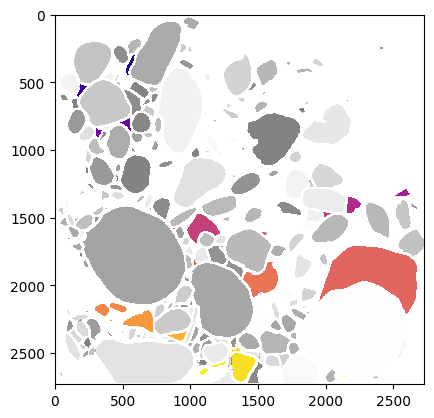

In [38]:
vals = np.linspace(0.5,1,256)
np.random.shuffle(vals)
cmap = plt.cm.colors.ListedColormap(plt.cm.gray(vals))
plt.imshow(merged_img, cmap=cmap)

plt.imshow(merged_img_IRn06, cmap='plasma')
